## 3장 신경망
> - 신경망은 가중치 매개변수의 적절한 값을 데이터로부터 __자동으로 학습하는 능력__이 신경망의 중요한 성질이다.

![test](./img/신경망.png)

> - 맨 왼쪽 줄은 일력층, 맨 오른쪽 줄은 출력층, 중간줄은 은닉층이라 한다.
> - 은닉층(Hidden)의 뉴련은 사람 눈에는 보이지 않는다.
> - 편향의 입력 신호는 항상 1이다.

![test](./img/퍼셉트론.png)

> - 여기서 b는 편향을 나타내는 매개변수로, __뉴런이 얼마나 쉽게 활성화되느냐를 제어__한다.
> - w1,w2는 각 신호의 __가중치를 나타내는 매개변수__로, 각 신호의 영향력을 제어한다.
> - 퍼셉트론의 동작은 x1,x2,1 이라는 3개의 신호가 뉴런에 입력되어, 각 신호에 가중치를 곱한 후, 다음 뉴런에 전달 된다. 그리고 다음 뉴런에서는 이들 신호의 값을 더하여, 그 합이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력한다.


### 활성화 함수
> - 입력신호의 총합을 출력신호로 변환하는 함수를 일반적으로 활성화 함수라 한다.

![test](./img/활성화함.png)

> - a = b + w1x1 + w2x2  
>  y = h(a)


> - 가중치가 달린 입력 신호와 편향의 총합을 계산하고 그 결과가 a라는 노드가 되고, 활성화 함수 h()를 통과하여 y라는 노드로 변환되는 과정이다.

### 시그모이드 함수
> - 다음은 신경망에서 자주 이용하는 활성화 함수인 시그모이드 함수를 나타낸 식이다.

![test](./img/시그모이드.jpg)

> - e는 자연상수로 2.7182..의 값을 갖는 실수이다.
> - 시그모이드는 입력을 주면 출력을 돌려주는 단순한 함수 일 뿐이다.
> - 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달한다.

### 계단 함수 구현
![test](./img/계단함수.gif)
> - 계단 함수는 위 식과 같이 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수이다.

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0
# 인수 x는 실수만 받아드린다. 즉, 3.0은 되지만 넘파이 배열을 인수로 넣을 순 없다.

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(int.int)
# 넘파이 트릭을 사용하여 넘파이 인수를 받도록 한다.

In [26]:
import numpy as np

In [4]:
x = np.array([-1.0,1.0,2.0])
x

array([-1.,  1.,  2.])

In [5]:
y = x > 0 # 넘파이 배열에 부등호 연산을 수행하면 배열의 각 원소에 부등호 연산을 수행한 bool배열 생성
print(y)
y = y.astype(np.int) # bool 자료형에서 int형ㅇ로 자료형 변환
print(y)

[False  True  True]
[0 1 1]


In [6]:
import numpy as np
import matplotlib.pylab as plt

In [7]:
def step_function(x):
    return np.array(x>0,dtype=np.int)

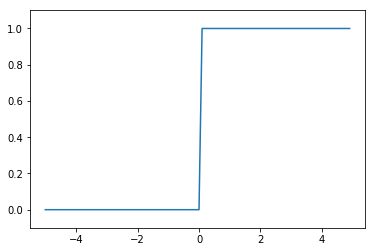

In [8]:
x = np.arange(-5.0,5.0,0.1) # -5 ~ 5 까지 0.1간격의 넘파이 배열을 생성
y = step_function(x) # 인수로 받은 넘파일 배열의 원소 각각을 인수로 계단 함수를 실행하여 다시 배열로 만들어준다.
plt.plot(x,y) 
plt.ylim(-0.1,1.1) # y축의 범위 지정
plt.show()
# 0을 경계로 출력에 0에서 1로 바뀐다.

### 시그모이드 함수 구현하기
![test](./img/시그모이드함수식.png)

In [19]:
def sigmoid(x):
    return 1/(1+np.exp(-x)) # np.exp(-x) = exp(-x)
# 여기선 인수 x가 넘파이 배열이어도 올바른 결과가 나온다

In [10]:
x = np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

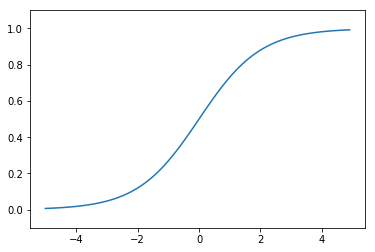

In [11]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y축 범위 지정
plt.show()

### 시그모이드 함수와 계단함수의 비교
> - 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적인 실수가 흐른다.
>> - 이 부드러운 곡선이 신경망 학습에서 아주 중요한 역할을 한다.
> - 퍼셉트론에서는 0 혹은 1이 흘렀다면, 신경망에서는 연속적인 실수가 흐른다.
> - 둘 다 입력이 중요하면 큰 값을 중요하지 않으면 작은 값을 출력
> - 입력이 아무리 작거나 커도 출력은 0 에서 1 사이라는 것도 둘의 공통점이다.
>> - 그 밖에도 둘 다 비선형 함수라는 공통점이 있다.
>> - 비선형 함수는 문자 그대로 '선형이 아닌' 함수 이다. 즉, 직선 1개로는 그릴 수 없는 함수를 말한다.
> - 층을 쌓는 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야 한다.

### ReLU 함수
> - ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수
![test](./img/렐루식.png)
![test](./img/렐루.jpg)

In [12]:
def relu(x):
    return np.maximum(0,x) # maximum은 두 입력 중 큰 값을 선택해 반환하는 함수

### 다차원 배열의 계산
- 다차원 배열도 그 기본은 '숫자의 집합' 이다.

In [13]:
import numpy as np

In [14]:
A = np.array([1,2,3,4]) # 1차원 배열
print(A)

[1 2 3 4]


In [15]:
np.ndim(A)

1

In [16]:
A.shape 
# A.shape이 튜플을 반환하는 것에 주의 
# 이는 1차원 배열이라도 다차원 배열일 때와 통일된 형태로 결과를 반환하기 위함.

(4,)

In [17]:
A.shape[0]

4

In [18]:
B = np.array([[1,2],[3,4],[5,6]])
print(B) # 2차원 배열

[[1 2]
 [3 4]
 [5 6]]


In [19]:
np.ndim(B)

2

In [20]:
B.shape
# 3X2 배열은 처음 차원에는 원소가 3개, 다음 차원에는 원소가 2개 있다는 의미

(3, 2)

### 행렬의 곱
> - np.dot(A,B)와 np.dot(B,A)는 다른 값이 될 수 있다는 점이다.
> - 행렬의 곱에서는 피연산자의 순서가 다르면 결과도 다르다.

In [21]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [22]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [23]:
np.dot(A,B) # 행렬의 곱

array([[19, 22],
       [43, 50]])

### 신경망에서의 행렬 곱

In [24]:
X = np.array([1,2])
X.shape

(2,)

In [25]:
W = np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [26]:
W.shape

(2, 3)

In [27]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


In [28]:
Y.shape

(3,)

### 3층 신경망 구현
> - 신경망에서의 계산을 행렬 계산으로 정리 할 수 있다.

In [29]:
X = np.array([1.0,0.5]) # shape 2,
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]) # shape (2,3)
B1 = np.array([0.1,0.2,0.3]) # shape 3,

In [30]:
print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [31]:
A1 = np.dot(X,W1) + B1 # shape 3,
Z1 = sigmoid(A1)
Z1 # shape 3,

array([0.57444252, 0.66818777, 0.75026011])

![test](./img/일층.png)

In [32]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]]) # shape 3,2
B2 = np.array([0.1,0.2]) # shape 2,

In [33]:
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [35]:
A2 = np.dot(Z1,W2) + B2 # shape 2,
Z2 = sigmoid(A2) # shape 2,
Z2 

array([0.62624937, 0.7710107 ])

![test](./img/2층.png)

In [36]:
def identity_function(x):
    return x

In [38]:
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3 
Y = identity_function(A3) 
print(Y)

[0.31682708 0.69627909]


- 항등 함수를 정의하고 , 이를 출력층의 활성화 함수로 사용 (항등함수는 입력을 그대로 출력하는 함수)
- 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다. 
> - 예를들어 회귀에는 항등함수를, 2진분류에는 시그모이드 함수를, 다중 분류에는 소프트맥스 함수를 사용하는 것이 일반적이다.

### 구현 정리

In [39]:
def init_network():
    network = {} # 가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    # network['W1']:KEY 값 / np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]): value 값
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    return network

def forward(network,X):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(X,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = identity_function(a3)    
    return y


In [40]:
network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


## 출력층 설계하기
> - 신경망은 분류와 회귀 모두에 이용된다.
> - 일반적으로 회귀에는 항등함수를, 분류에는 소프트맥스함수를 사용한다.

### 항등함수와 소프트맥스함수 구현하기
- 항등 함수 입력을 그대로 출력한다. 입력과 출력이 항상 같다는 뜻이다.
![test](./img/항등함수.png)
- 소프트맥스 함수는 주로 분류에서 많이 사용한다.
![test](./img/소프트맥스.png)
> - n은 출력층의 뉴럭수, y(k)는 그중 k번째 출력을 뜻한다.
> - 소프트맥스 함수의 분자는 입력신호 a(k)의 지수함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성된다.

![test](./img/소맥신경망.png)
> - 소프트맥스의 출력은 모든 입력 신호로부터 화살표를 받습니다. 

In [38]:
a = np.array([0.3,2.9,4.0])

exp_a = np.exp(a) # exp(a) 지수함수
print(exp_a) # shape 3,

sum_exp_a = np.sum(exp_a) # 지수함수들의 합
print(sum_exp_a) # shape 1,

y = exp_a / sum_exp_a # 소프트맥스 함수 식
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [42]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### 소프트맥스 함수 구현 시 주의점
- 오버플로 문제
> - 소프트맥스 함수는 지수 함수를 사용하는데, 지수 함수란 것이 아주 큰 값을 내뱉는다.
> - 컴퓨터의 수를 4바이트나 8바이트와 같이 유한한 데이터로 다룬다.
>> - 다시 말해 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현 할 수 없다는 문제가 발생한다.

![test](./img/소프트맥스.png)

- C라는 임의의 정수를 분자와 분모 양쪽에 똑같이 곱하고
- C를 지수 함수 exp()안으로 옮겨 log를 취한다.

In [43]:
a = np.array([1010,1000,990])
A = softmax(a) # 지수함수에 1010,1000,990 승을 하면 매우 큰 값을 뱉어 inf(무한대)
print(A)

[nan nan nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [44]:
C = np.max(a)
y = a-C # 하지만 입력 값들 중 최대값을 빼서 계산을 하면 올바르게 계산가능
print(y)

[  0 -10 -20]


In [45]:
np.exp(y) / np.sum(np.exp(y))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

- 즉, 핵심은 오버플로를 막기 위해 어떤 정수를 더해도 혹은 빼도 결과는 바뀌지 않는다는 점이다

In [18]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 분자 분모 양쪽에 입력값의 최대 값을 빼준다. 결과는 같다.
    sum_exp_a = np.sum(exp_a) # 오버플로 대책
    y = exp_a / sum_exp_a
    return y

In [50]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

- 소프트맥스 함수의 출력은 0 ~ 1 사이의 실수이다. 또한 그 출력의 총합은 '1'이다.
- 출력 총합이 1이 된다는 것은 출력을 확률로 해석할 수 있다.
> - 즉, 소프트맥스 함수를 이용함으로써 문제를 확률적(통계적)으로 대응할 수 있게 되는 것이다.
> - 주의점으로, 소프트맥스 함수를 적용해도 각 원소(np.array)의 대소 관계는 변하지 않는다.
>> - y = exp(x)가 단조 증가 함수이기 때문이다.
>> - 그 말은 결과적으로 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 무방하다.
- 추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적이다.(원소의 대소 관계가 변하지 않기 때문에) 한편, 신경망을 학습시킬 때는 출력층에서 소프트맥스 함수를 사용한다.

### 손글씨 숫자 인식
- 신경망도 두 단계를 거쳐 문제를 해결한다. 먼저 훈련 데이터(학습데이터)를 사용해 가중치 매개변수를 학습하고, 추론 단계에서는 앞서 학습한 매개변수를 사용하여 입력 데이터를 분류한다.
- 여기서는 학습과정을 생략하고 추론과정을 먼저 구현한다. 이 추론 과정을 신경망의 순전파라고도 한다.

### MNIST 데이터셋
- 0 ~ 9 까지의 숫자 이미지로 구성
- train_set:60,000, test_set:10,000

In [17]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt
from PIL import Image # 이미지 표시 모듈
import pickle

In [6]:
(x_train,y_train), (x_test,y_test) = load_mnist(flatten=True,normalize=False)

- normalize: 입력 이미지 픽셀 값을 0.0 ~ 1.0 사이의 값으로 정규화 하는지 설정
- flatten: 1차원 배열로 만들지 설정
- one_hot_label: 원-핫 인코딩 형태로 할지 설정

In [9]:
print(x_train.shape) 
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [14]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    # 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환하기 위해 fromarray() 수행
    pil_img.show()

In [15]:
img = x_train[0] # train_set의 첫번째 데이터 정보
label = y_train[0] # 첫번 째 label 이미지
print(label)

5


In [16]:
print(img.shape)
img = img.reshape(28,28) # 1차원 배열의 데이터를 원래의 이미지 모양으로 변형
print(img.shape)

img_show(img) # 숫자 5 이미지 출력

(784,)
(28, 28)


### 신경망의 추론 과정

In [20]:
def get_data():
    (x_train,y_train), (x_test,y_test) = load_mnist(flatten=True,normalize=True,one_hot_label=False)  
    return x_test,y_test # 데이터를 불러오고 test_set을 return
def init_network():
    with open('sample_weight.pkl','rb') as f: # 가중치 정보를 f변수에 할당
        network = pickle.load(f) # f 변수의 정보를 불러와 network 변수에 할당
    return network # network 변수 return
def predict(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)
    
    return y

### 정확도 측정

In [25]:
x, t = get_data() # 데이터 불러오기
network = init_network() # 가중치 값들 할당 

accuracy_cnt = 0 # 정확도 측정 변수 초기화

for i in range(len(x)): # len(X): 10,000
    y = predict(network,x[i]) # x[i]  0 ~ 9999까지 데이터 예측
    p = np.argmax(y) # softmax를 통해 가장 값이 높은 인덱스 추출
    if p == t[i]: # 예측한 index와 실제 index가 같다면
        accuracy_cnt += 1 # 1씩 누적으로 더 한다.
print("정확도:",float(accuracy_cnt/len(x))) # 누적한 accuracy_cnt를 전체 데이터에서 평균 낸다.

정확도: 0.9352


### 배치처리
- 배치 처리는 컴퓨터로 계산할 때 큰 이점을 준다. 
> - 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 최적화 되어있기 때문
> - 커다란 신경망에서는 데이터 전송이 병목으로 작용하는 경우가 자주 있는데, 배치 처리 함으로써 컴퓨터에게 주는 부하를 줄일 수있다.
> - 즉, 큰 배열로 이뤄진 계산을 하는데, 컴퓨터에서는 큰 배열을 한꺼번에 계산하는 것이 작은 배열을 여러 번 계산하는 것 보다 빠르다.

### 배치처리구현

In [27]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0 # 정확도 변수 초기화

for i in range(0,len(x),batch_size): # 0 ~ len(x)까지 100장씩 묶어서 꺼낸다.
    x_batch = x[i:i+batch_size] # 0 ~ 99 -> 100 ~ 199 -> .. ->
    y_batch = predict(network,x_batch) # 배치 단위로 예측을 수행 
    p = np.argmax(y_batch,axis=1) # axis = 1  각 행의 가장 큰 값의 index 추출
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("정확도:",float(accuracy_cnt/len(x)))

정확도: 0.9352
